# Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

# Carregando os Dados

In [2]:
# Carrega o dataset
df = pd.read_csv('Dataset/dataset.csv')

In [3]:
# Shape
df.shape

(9700, 11)

In [4]:
# Amostra dos dados
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
# Amostra dos dados
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


In [6]:
def check_df(dataframe, head=5):
    print("--------------------- Shape --------------------")
    print(dataframe.shape)
    print("--------------------- Info ---------------------")
    print(dataframe.info())
    print("--------------------- Columns ---------------------")
    print(dataframe.columns)
    print("--------------------- Missing Values ---------------------")
    print(dataframe.isnull().sum())
    print("--------------------- Duplicate ---------------------")
    print(dataframe.duplicated().sum())
    print("--------------------- Count of Unique Values ---------------------")
    print(dataframe.nunique())
    print("--------------------- Quantiles ---------------------")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

data_=pd.DataFrame(df.isnull().sum(),columns=['Number Of Null'])
data_['Precision']=data_['Number Of Null']/len(df)*100
data_

--------------------- Shape --------------------
(9700, 11)
--------------------- Info ---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB
None
--------------------- Columns ---------------------
Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Ca

,Number Of Null,Precision
ID_Pedido,0,0.0
Data_Pedido,0,0.0
ID_Cliente,0,0.0
Segmento,0,0.0
Pais,0,0.0
Cidade,0,0.0
Estado,0,0.0
ID_Produto,0,0.0
Categoria,0,0.0
SubCategoria,0,0.0


# Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [7]:
# Primeiro filtramos o dataframe com os registros da categoria que desejamos
df_p1 = df[df['Categoria'] == 'Office Supplies']

# Em seguida agrupamos por cidade e calculamos o total de valor_venda
df_p1_total = df_p1.groupby('Cidade')['Valor_Venda'].sum()

# Encontra a cidade com maior valor de venda
cidade_maior_venda = df_p1_total.idxmax()
cidade_maior_venda

'New York City'

Descubrimos que a cidade com maior valor de venda para 'Office Supplies' é New York City.

In [8]:
# Para conferir o resultado
df_p1_total.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

# Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [9]:
# Convertemos a coluna de data para o tipo datetime para obter o formato adequado
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)

In [10]:
# Calculamos o total de vendas para cada data de pedido
df_p2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()

In [11]:
df_p2.head(10)

Data_Pedido
2015-01-03      16.448
2015-01-04     288.060
2015-01-05      19.536
2015-01-06    4407.100
2015-01-07      87.158
2015-01-09      40.544
2015-01-10      54.830
2015-01-11       9.940
2015-01-13    3553.795
2015-01-14      61.960
Name: Valor_Venda, dtype: float64

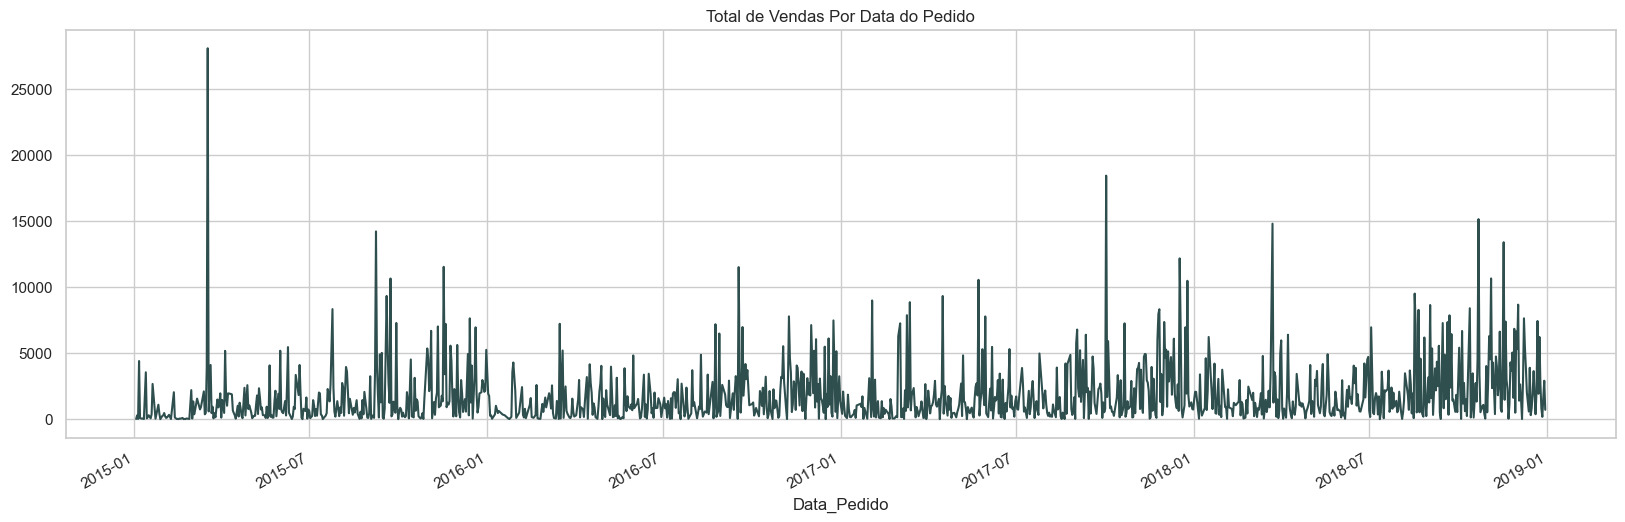

In [12]:
# Plot
plt.figure(figsize = (20, 6))
df_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'darkslategray')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

# Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [13]:
# Agrupamos por estado e calculamos o total de vendas
df_p3 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

In [14]:
df_p3

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980
5,Connecticut,13366.7370
6,Delaware,26452.5890
7,District of Columbia,2865.0200
8,Florida,88043.7000
9,Georgia,48083.1600


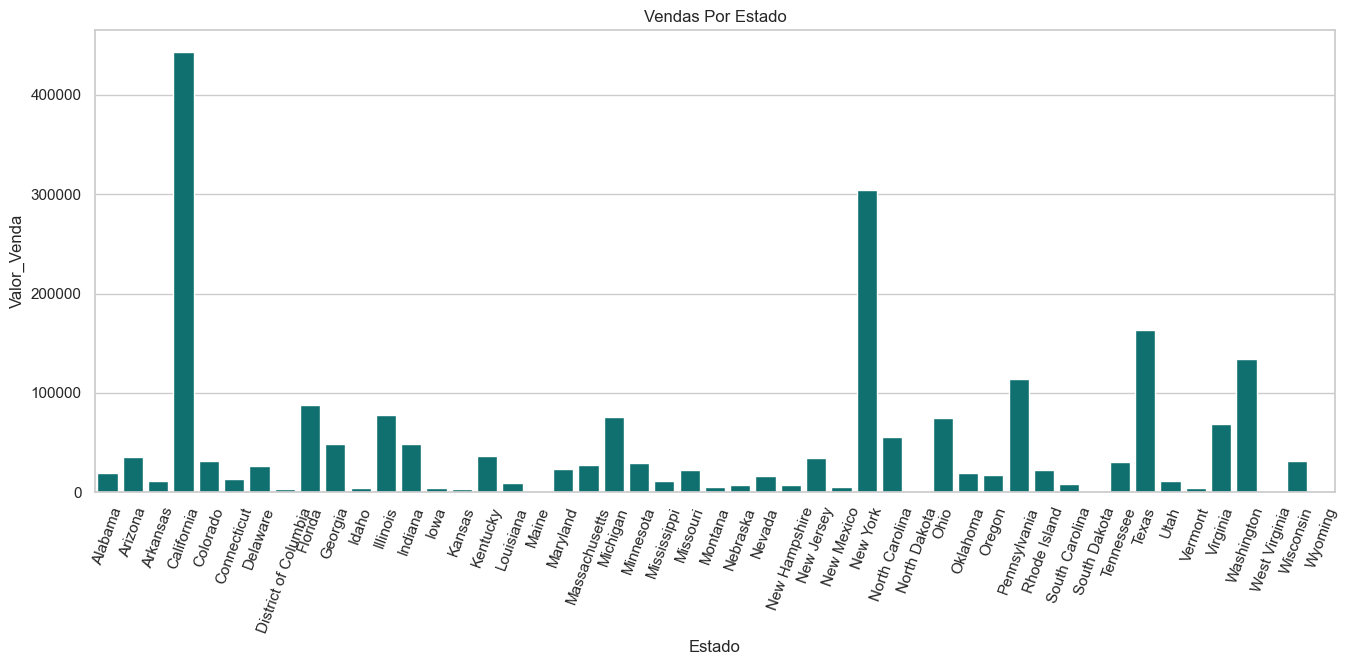

In [15]:
# Plot
plt.figure(figsize = (16, 6))
sns.barplot(data = df_p3, y = 'Valor_Venda', x = 'Estado', color="teal").set(title = 'Vendas Por Estado')
plt.xticks(rotation = 70)
plt.show()

# Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [16]:
# Agrupamos por cidade, calculamos o total de vendas e ordenamos listando somente os 10 primeiros registros
df_p4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                   ascending = False).head(10)

In [17]:
df_p4

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


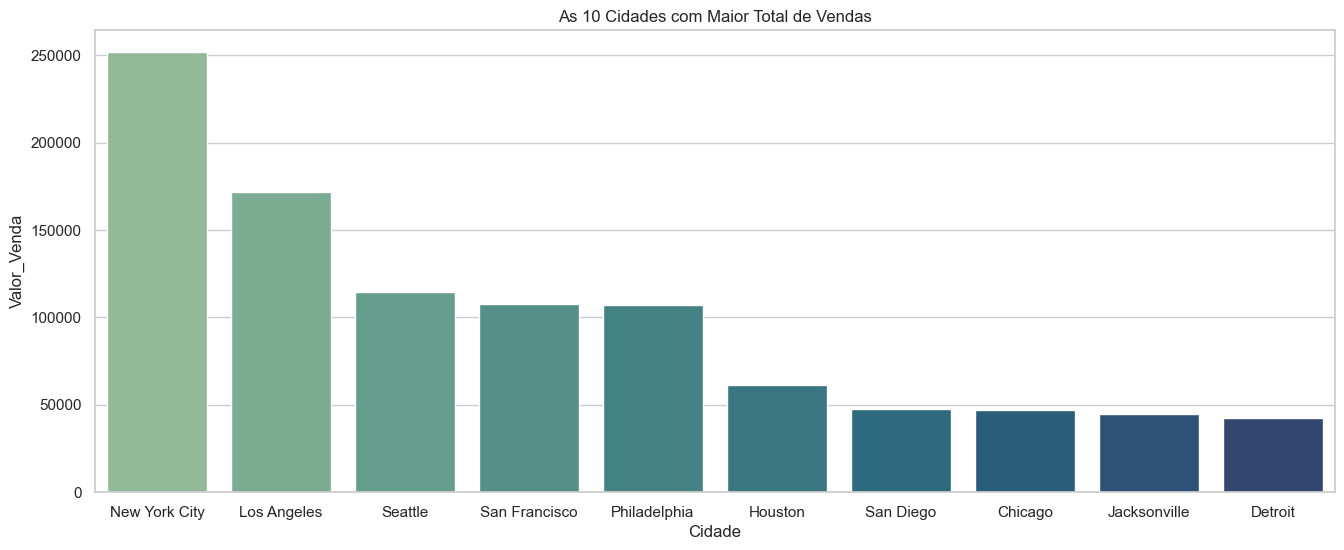

In [18]:
# Plot
plt.figure(figsize = (16, 6))
sns.barplot(data = df_p4, y = 'Valor_Venda', x = 'Cidade', palette='crest').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

As 10 cidades com o maior total de vendas são NYC, Los Angeles, Seatle, San Francisco, Philadelphia, Houston, San Diego, Chicago, Jacksonville e Detroit.

# Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [19]:
# Agrupamos por segmento e calculamos o total de vendas
df_p5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                            ascending = False)

In [20]:
df_p5

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [21]:
# Função para converter os dados em valor absoluto
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

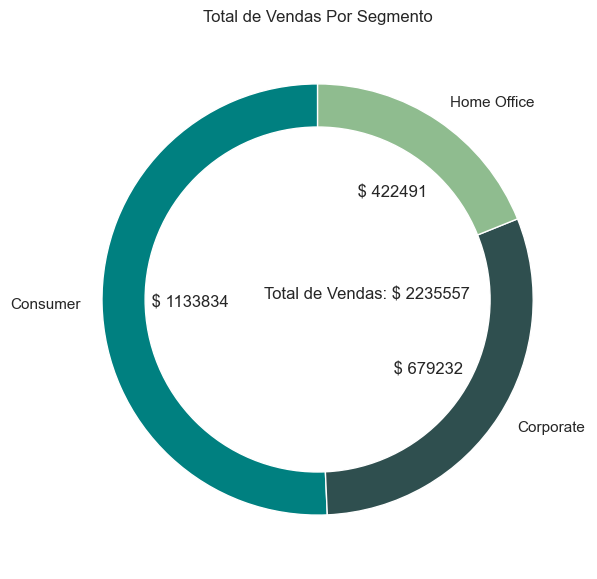

In [22]:
# Plot

# Tamanho da figura
plt.figure(figsize = (17, 7))

# Gráfico de pizza
plt.pie(df_p5['Valor_Venda'], 
        labels = df_p5['Segmento'],
        autopct = autopct_format(df_p5['Valor_Venda']),
        startangle = 90,
       colors = ['teal','darkslategray','darkseagreen'])

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.80, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_p5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

O segmento com maior número de vendas foi 'Consumer' com $1.133.834-

# Pergunta de Negócio 6:

### Qual o Total de Vendas Por Segmento e Por Ano?

In [23]:
# Extraímos o ano criando nova variável 'Ano'
df['Ano'] = df['Data_Pedido'].dt.year

In [24]:
# Total de vendas por segmento e por ano
df_p6 = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

In [25]:
df_p6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

# Pergunta de Negócio 7:

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [26]:
# Cria uma nova coluna (Desconto) de acordo com a regra definida acima
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)

In [27]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [28]:
# Total por cada valor da variável
df['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [29]:
print('No total 457 vendas receberiam desconto de 15%.')

No total 457 vendas receberiam desconto de 15%.


# Pergunta de Negócio 8:

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [30]:
# Criamos uma coluna calculando o valor de venda menos o desconto
df['Valor_Venda_Desconto'] = df['Valor_Venda'] - (df['Valor_Venda'] * df['Desconto'])

In [31]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [32]:
# Filtrando as vendas antes do desconto de 15%
df_p8_vendas_antes_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Venda']

# Filtrando as vendas depois do desconto de 15%
df_p8_vendas_depois_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Venda_Desconto']

In [33]:
# Calcula a média das vendas antes do desconto de 15%
media_vendas_antes_desconto = df_p8_vendas_antes_desconto.mean()

# Calcula a média das vendas depois do desconto de 15%
media_vendas_depois_desconto = df_p8_vendas_depois_desconto.mean()

In [34]:
print("A média das vendas antes do desconto de 15% é", round(media_vendas_antes_desconto, 2), "y a média das vendas depois do desconto de 15% é", round(media_vendas_depois_desconto, 2))

A média das vendas antes do desconto de 15% é 2116.81 y a média das vendas depois do desconto de 15% é 1799.29


# Pergunta de Negócio 9:

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [35]:
# Extraímos o mês e gravamos em uma nova variável
df['Mes'] = df['Data_Pedido'].dt.month

In [36]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [37]:
# Agrupamos por ano, mês e segmento e calculamos estatísticas de agregação
df_p9 = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])

In [38]:
df_p9

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [39]:
# Vamos extrair os níveis
anos = df_p9.index.get_level_values(0) #Ano
meses = df_p9.index.get_level_values(1) #Mes
segmentos = df_p9.index.get_level_values(2) #Segmento

<Figure size 1200x600 with 0 Axes>

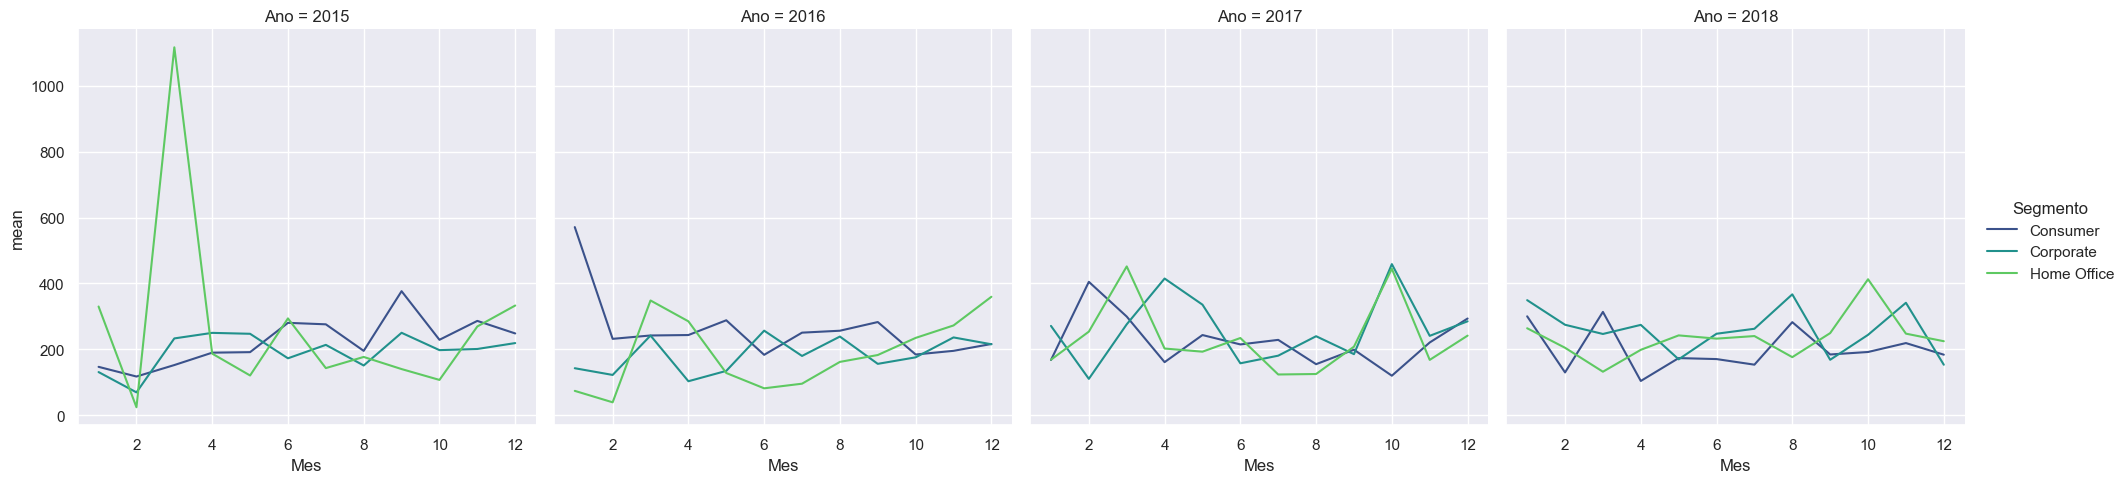

In [40]:
# Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_p9, 
                   y = 'mean', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 4,
                  palette = 'viridis')
plt.show()

# Pergunta de Negócio 10:

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [41]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
df_p10 = df.groupby(['Categoria',
                    'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',
                                                                                   ascending = False).head(12)

In [42]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
df_p10 = df_p10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

Obs: Classificar o item acima por categoria é importante para preencher o gráfico com as subcategorias para cada categoria de forma ordenada.

In [43]:
# Dataframe com categorias e subcategorias
df_p10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [44]:
# Criamos outro dataframe somente com os totais por categoria
df_p10_cat = df_p10.groupby('Categoria').sum(numeric_only = True).reset_index()

df_p10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [45]:
# Listas de cores para categorias
cores_categorias = ['teal','darkslategray','darkseagreen']

# Listas de cores para subcategorias
cores_subcategorias = ['mediumaquamarine',
                       'mediumaquamarine',
                       'mediumaquamarine',
                       'mediumaquamarine',
                       'lightseagreen',
                       'lightseagreen',
                       'lightseagreen',
                       'lightseagreen',
                       'honeydew',
                       'honeydew',
                       'honeydew',
                       'honeydew']

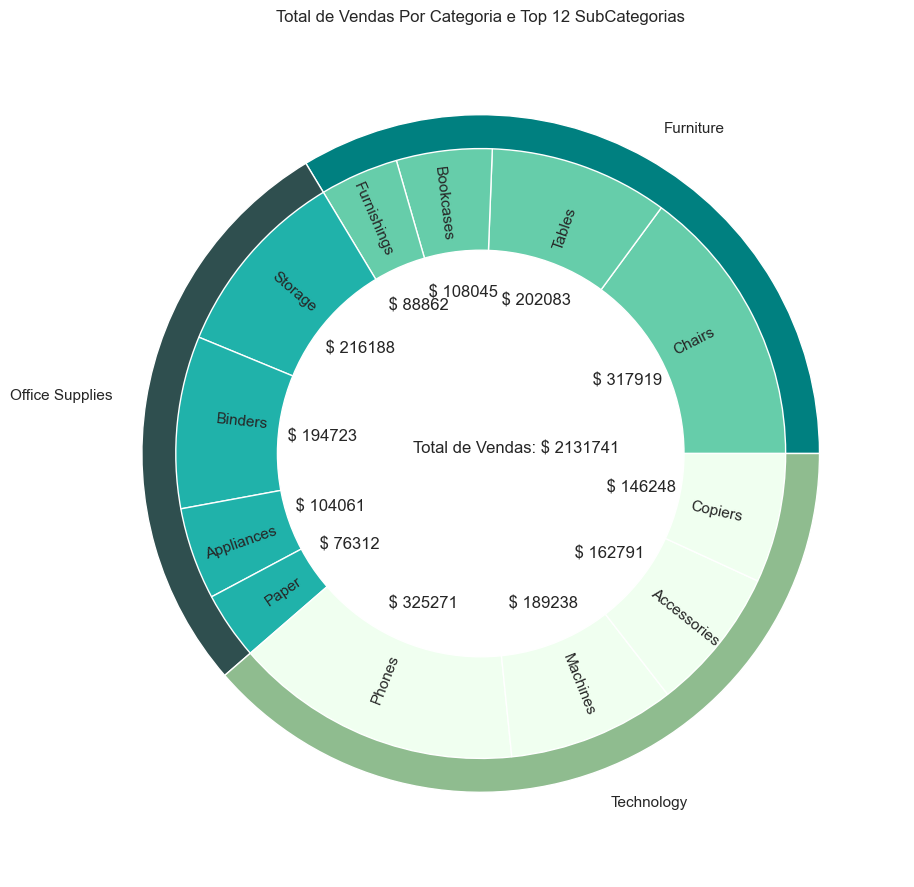

In [46]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (17,11))

# Gráfico das categorias
p1 = ax.pie(df_p10_cat['Valor_Venda'], 
            radius = 1,
            labels = df_p10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_p10['Valor_Venda'],
            radius = 0.9,
            labels = df_p10['SubCategoria'],
            autopct = autopct_format(df_p10['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_p10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()